In [1]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()
df= pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
import pandas as pd
df_plano = pd.json_normalize(data)
df_plano

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


**Checagem dos dados**

In [3]:
print("\nTipos de dados:")
df_plano.dtypes


Tipos de dados:


,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [4]:
print("Colunas do dataset:")
df_plano.columns

Colunas do dataset:


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [5]:
df_plano.duplicated().any()

np.False_

In [6]:
df_plano.duplicated().sum()

np.int64(0)

In [7]:
print(df_plano.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [8]:
print('Dados ausentes:')
missing = df_plano.isnull().sum()
print("Valores ausentes por coluna:")
print(missing[missing > 0])

Dados ausentes:
Valores ausentes por coluna:
Series([], dtype: int64)


In [9]:
print('Há dados do tipo NaN?:')
print(df_plano.isnull().values.any())

Há dados do tipo NaN?:
False


In [10]:
print('Contando dados nulos por coluna:')
print(df_plano.isnull().sum())


Contando dados nulos por coluna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [11]:
print('Dados nulos para diferentes tipos:')
print(df_plano.isna().values.any())

Dados nulos para diferentes tipos:
False


In [12]:
df_check = df_plano.replace(r'^\s*$', pd.NA, regex=True)
print(df_check.isna().sum())

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64


Tratando dados vazios

In [13]:
df_plano = df_plano.replace(r'^\s*$', pd.NA, regex=True)
df_plano = df_plano.dropna(subset=['Churn', 'account.Charges.Total'])

df_plano['Churn'] = df_plano['Churn'].fillna('undeclared')
df_plano['account.Charges.Total'] = df_plano['account.Charges.Total'].fillna(0)

Verificando novamente df_plano

In [14]:
df_check = df_plano.replace(r'^\s*$', pd.NA, regex=True)
print(df_check.isna().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


Está ok

**Colunas mais relevantes**

In [15]:
colunas_relevantes = [
    'customerID',
    'Churn',
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'customer.tenure',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

In [16]:
df_relevante = df_plano[colunas_relevantes].copy()
df_relevante.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
Categorical_cols = df_relevante.select_dtypes(include=['object']).columns
print("\nCategorias únicas por coluna categórica:")
for col in Categorical_cols:
    print(f"\n{col}:")
    print(df_relevante[col].value_counts(dropna=False).sort_index())


Categorias únicas por coluna categórica:

customerID:
customerID
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: count, Length: 7032, dtype: int64

Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

customer.gender:
customer.gender
Female    3483
Male      3549
Name: count, dtype: int64

customer.Partner:
customer.Partner
No     3639
Yes    3393
Name: count, dtype: int64

customer.Dependents:
customer.Dependents
No     4933
Yes    2099
Name: count, dtype: int64

phone.PhoneService:
phone.PhoneService
No      680
Yes    6352
Name: count, dtype: int64

phone.MultipleLines:
phone.MultipleLines
No                  3385
No phone service     680
Yes                 2967
Name: count, dtype: int64

internet.InternetService:
internet.InternetService
DSL            2416
Fiber optic    3096
No             1520
Name: count, dtype: int64

internet.Onlin

In [18]:
numerical_cols = df_relevante.select_dtypes(include=['int64', 'float64']).columns
print("\nResumo estatístico das colunas numéricas:")
print(df_relevante[numerical_cols].describe())


Resumo estatístico das colunas numéricas:
       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly
count             7032.000000      7032.000000              7032.000000
mean                 0.162400        32.421786                64.798208
std                  0.368844        24.545260                30.085974
min                  0.000000         1.000000                18.250000
25%                  0.000000         9.000000                35.587500
50%                  0.000000        29.000000                70.350000
75%                  0.000000        55.000000                89.862500
max                  1.000000        72.000000               118.750000


In [19]:
df_limpo = df_relevante

In [20]:
df_limpo['Contas_Diarias'] = df_relevante['account.Charges.Monthly'] / 30

In [21]:
df_limpo['Contas_Diarias']

,Contas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [22]:
df_limpo['Churn'] = (
    df_limpo['Churn']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({'yes': 1, 'no': 0})
)

/tmp/ipython-input-2594152230.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'yes': 1, 'no': 0})


In [23]:
df_limpo['Churn']

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [24]:
print(df_limpo['Churn'].unique())

[0 1]


**Análise de evasão**

In [25]:
desc_num = df_limpo.describe().T
print(desc_num[['mean', '50%', 'std', 'min', 'max', 'count']])

                              mean     50%        std        min         max  \
Churn                     0.265785   0.000   0.441782   0.000000    1.000000   
customer.SeniorCitizen    0.162400   0.000   0.368844   0.000000    1.000000   
customer.tenure          32.421786  29.000  24.545260   1.000000   72.000000   
account.Charges.Monthly  64.798208  70.350  30.085974  18.250000  118.750000   
Contas_Diarias            2.159940   2.345   1.002866   0.608333    3.958333   

                          count  
Churn                    7032.0  
customer.SeniorCitizen   7032.0  
customer.tenure          7032.0  
account.Charges.Monthly  7032.0  
Contas_Diarias           7032.0  


In [26]:
cat_cols = df_limpo.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"\nContagem valores para {col}:")
    print(df_limpo[col].value_counts(dropna=False))


Contagem valores para customerID:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64

Contagem valores para customer.gender:
customer.gender
Male      3549
Female    3483
Name: count, dtype: int64

Contagem valores para customer.Partner:
customer.Partner
No     3639
Yes    3393
Name: count, dtype: int64

Contagem valores para customer.Dependents:
customer.Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Contagem valores para phone.PhoneService:
phone.PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Contagem valores para phone.MultipleLines:
phone.MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

Contagem valores para internet.InternetService:
internet.InternetService
Fiber optic    3096
DSL            2416
No           

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

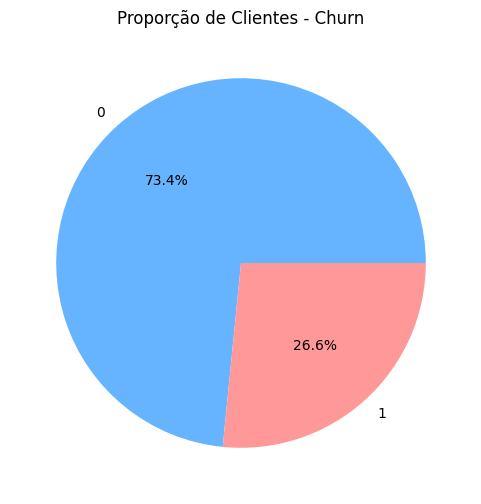

In [28]:
churn_counts = df_limpo['Churn'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Proporção de Clientes - Churn')
plt.show()

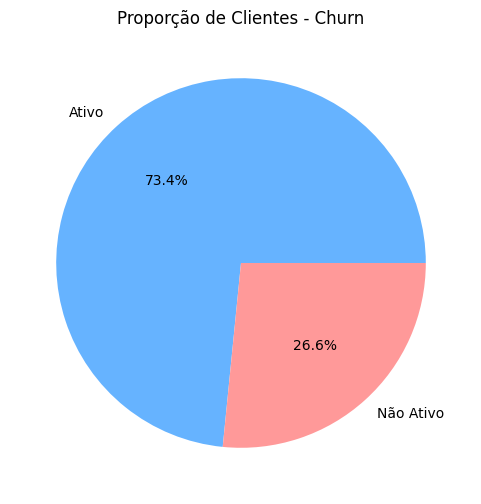

In [29]:
churn_counts = df_limpo['Churn'].map({0: 'Ativo', 1: 'Não Ativo'}).value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999']
)
plt.title('Proporção de Clientes - Churn')
plt.show()

In [30]:
categoricas = [
    'customer.gender',
    'account.Contract',
    'account.PaymentMethod'
]

for col in categoricas:
    print(f"\nEvasão por {col}:")
    if col in df_limpo.columns:

        count = df_limpo[col].value_counts(dropna=False)
        churn_rate = df_limpo.groupby(col)['Churn'].mean() * 100

        resumo = pd.DataFrame({
            'Quantidade': count,
            'Taxa de Evasão (%)': churn_rate.round(2)
        }).sort_index()

        print(resumo)
    else:
        print(f"Coluna {col} não encontrada")


Evasão por customer.gender:
                 Quantidade  Taxa de Evasão (%)
customer.gender                                
Female                 3483               26.96
Male                   3549               26.20

Evasão por account.Contract:
                  Quantidade  Taxa de Evasão (%)
account.Contract                                
Month-to-month          3875               42.71
One year                1472               11.28
Two year                1685                2.85

Evasão por account.PaymentMethod:
                           Quantidade  Taxa de Evasão (%)
account.PaymentMethod                                    
Bank transfer (automatic)        1542               16.73
Credit card (automatic)          1521               15.25
Electronic check                 2365               45.29
Mailed check                     1604               19.20


In [31]:
categoricas = ['customer.gender', 'account.Contract', 'account.PaymentMethod']


In [32]:
for col in categoricas:
    if col in df_limpo.columns:
        print(f"\nValores únicos em '{col}':")
        print(df_limpo[col].unique())
        print(f"Quantidade de valores não nulos em '{col}': {df_limpo[col].notnull().sum()}")
    else:
        print(f"\nColuna '{col}' não encontrada no DataFrame.")


Valores únicos em 'customer.gender':
['Female' 'Male']
Quantidade de valores não nulos em 'customer.gender': 7032

Valores únicos em 'account.Contract':
['One year' 'Month-to-month' 'Two year']
Quantidade de valores não nulos em 'account.Contract': 7032

Valores únicos em 'account.PaymentMethod':
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Quantidade de valores não nulos em 'account.PaymentMethod': 7032


In [33]:
df_filtrado = df_limpo.dropna(subset=['Churn'] + categoricas)

for col in categoricas:
    print(f"\nEvasão por {col} (após filtrar nulos):")
    count = df_filtrado[col].value_counts()
    churn_rate = df_filtrado.groupby(col)['Churn'].mean() * 100

    resumo = pd.DataFrame({
        'Quantidade': count,
        'Taxa de Evasão (%)': churn_rate.round(2)
    }).sort_index()
    print(resumo)


Evasão por customer.gender (após filtrar nulos):
                 Quantidade  Taxa de Evasão (%)
customer.gender                                
Female                 3483               26.96
Male                   3549               26.20

Evasão por account.Contract (após filtrar nulos):
                  Quantidade  Taxa de Evasão (%)
account.Contract                                
Month-to-month          3875               42.71
One year                1472               11.28
Two year                1685                2.85

Evasão por account.PaymentMethod (após filtrar nulos):
                           Quantidade  Taxa de Evasão (%)
account.PaymentMethod                                    
Bank transfer (automatic)        1542               16.73
Credit card (automatic)          1521               15.25
Electronic check                 2365               45.29
Mailed check                     1604               19.20


**Extra:**

In [34]:
correlacao_daily_churn = df_limpo['Contas_Diarias'].corr(df_limpo['Churn'])
print("Correlação entre conta diária e evasão:", correlacao_daily_churn)

Correlação entre conta diária e evasão: 0.19285821847007872


/tmp/ipython-input-3317186315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


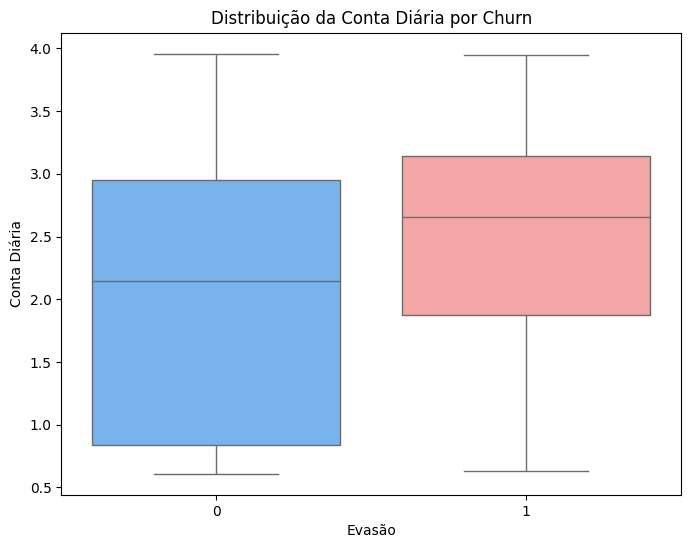

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Churn',
    y='Contas_Diarias',
    data=df_limpo,
    palette=['#66b3ff','#ff9999']
)
plt.title('Distribuição da Conta Diária por Churn')
plt.xlabel('Evasão')
plt.ylabel('Conta Diária')
plt.show()

In [36]:
df_limpo.to_csv("df_limpo_atualizado.csv", index=False)


**Relatório Final**

Esse trablho começou com a extrção dos dados, que foram extraídos do gith e nomeados como a variável 'url'. Para melhor visualização e extração dos dados foi utilizado o comando "pd.json_normalize()" o que possibilitou a visualização correta de todos os dados.
Após esse momento passei pelo primeiro desafio, avaliar possíveis dados com problemas, sendo eles do tipo NaN, ou dados em branco, linhas duplicadas e demais problemas que dificultaria as seguintes análises. Logo mais, foram selecionadas apenas as colunas que eram mais importantes para a análise de evasão. Criamos uma coluna chamada "Contas_Diarias" que foi definida da seguinte forma: (df_limpo['Contas_Diarias'] = df_relevante['account.Charges.Monthly'] / 30).
Após essa preparação foi possível prosseguir com as análise, avaliando a evasão e sua realção com diferentes variáveis, como idade, genero. Com isso foi finalizado a primeira parte do desafio Telecom X - Análise de Evasão de Clientes.